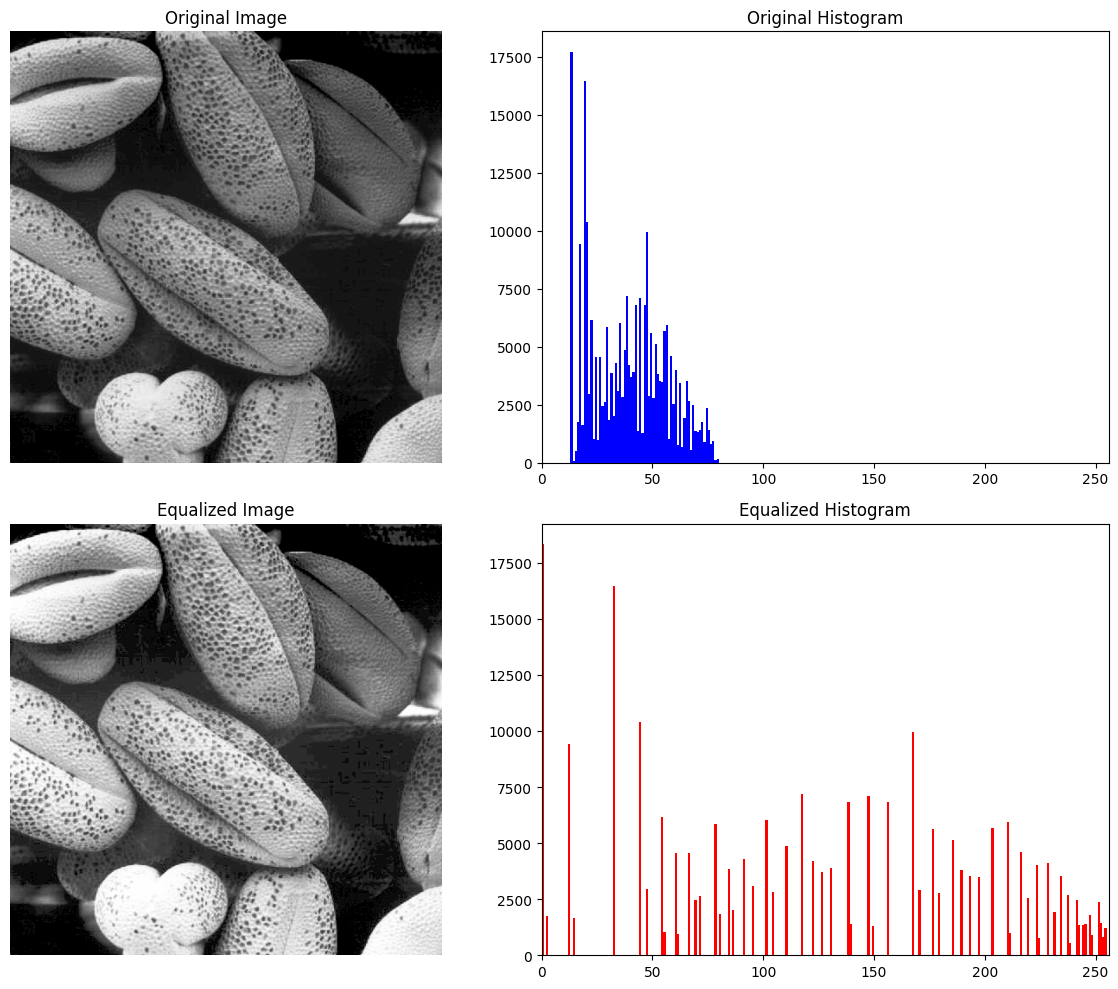

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to perform histogram equalization
def histogram_equalization(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Get image dimensions
    h, w = gray_image.shape
    
    # Calculate the histogram
    hist, bins = np.histogram(gray_image.flatten(), 256, [0, 256])

    # Calculate cumulative distribution function (CDF)
    cdf = hist.cumsum()
    
    # Normalize the CDF
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Apply histogram equalization
    cdf_m = np.ma.masked_equal(cdf, 0)  # Mask zeros to avoid division by zero
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Normalize the cdf
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')  # Fill masked values with 0

    # Use the CDF to map the old pixel values to the new values
    equalized_image = cdf[gray_image]

    return gray_image, equalized_image, hist, cdf_normalized

# Load the image (replace 'image_path' with the correct path to your image)
image = cv2.imread('utils/shells.tif')

# Perform histogram equalization
gray_image, equalized_image, hist, cdf_normalized = histogram_equalization(image)

# Plot the original and equalized images
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Display the original image and histogram
ax[0, 0].imshow(gray_image, cmap='gray')
ax[0, 0].set_title("Original Image")
ax[0, 0].axis('off')

ax[0, 1].hist(gray_image.flatten(), 256, [0, 256], color='blue')
ax[0, 1].set_title("Original Histogram")
ax[0, 1].set_xlim([0, 256])

# Display the equalized image and histogram
ax[1, 0].imshow(equalized_image, cmap='gray')
ax[1, 0].set_title("Equalized Image")
ax[1, 0].axis('off')

ax[1, 1].hist(equalized_image.flatten(), 256, [0, 256], color='red')
ax[1, 1].set_title("Equalized Histogram")
ax[1, 1].set_xlim([0, 256])

plt.tight_layout()
plt.show()